In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
import re
import sys
import pandas as pd
import numpy as np
from datetime import date, timedelta
from datetime import datetime

original_path = r'local_path'
os.chdir(original_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_df = pd.read_csv("AirlineSentiment.csv")

data_df.columns = [re.sub(r'\W+', '', column.replace(' ', '_').lower()) for column in data_df.columns]
data_df.columns = [re.sub(r'(?<![a-zA-Z])_|_(?![a-zA-Z])', '', column) for column in data_df.columns]

data_df.drop(columns=['chosen'], inplace=True)

print(data_df.head())
print(data_df.info())

           uid        name         airline  \
0  681448153.0    jnardino  Virgin America   
1  681448158.0    jnardino  Virgin America   
2  681448165.0  cjmcginnis  Virgin America   
3  681448167.0       pilot  Virgin America   
4  681448169.0    dhepburn  Virgin America   

                                                text    tweet_created  \
0  @VirginAmerica plus you've added commercials t...  2/24/2015 11:15   
1  @VirginAmerica it's really aggressive to blast...  2/24/2015 11:15   
2  @VirginAmerica yes, nearly every time I fly VX...  2/24/2015 11:13   
3  @VirginAmerica Really missed a prime opportuni...  2/24/2015 11:12   
4  @virginamerica Well, I didn't‰Û_but NOW I DO! :-D  2/24/2015 11:11   

    tweet_city tweet_state  
0    Worcester         MA   
1    Worcester         MA   
2    San Diego          CA  
3  Los Angeles          CA  
4    San Diego          CA  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13787 entries, 0 to 13786
Data columns (total 7 columns):
 #

In [3]:
data_df['text'] = data_df['text'].str.replace("[^a-zA-Z]", " ")
data_df["text"] = [s.strip() for s in data_df["text"].astype(str)]
print(data_df.head())

           uid        name         airline  \
0  681448153.0    jnardino  Virgin America   
1  681448158.0    jnardino  Virgin America   
2  681448165.0  cjmcginnis  Virgin America   
3  681448167.0       pilot  Virgin America   
4  681448169.0    dhepburn  Virgin America   

                                                text    tweet_created  \
0  VirginAmerica plus you ve added commercials to...  2/24/2015 11:15   
1  VirginAmerica it s really aggressive to blast ...  2/24/2015 11:15   
2  VirginAmerica yes  nearly every time I fly VX ...  2/24/2015 11:13   
3  VirginAmerica Really missed a prime opportunit...  2/24/2015 11:12   
4   virginamerica Well  I didn t   but NOW I DO    D  2/24/2015 11:11   

    tweet_city tweet_state  
0    Worcester         MA   
1    Worcester         MA   
2    San Diego          CA  
3  Los Angeles          CA  
4    San Diego          CA  


<ipython-input-3-ff19911952d4>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df['text'] = data_df['text'].str.replace("[^a-zA-Z]", " ")


In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

vs_com = []
vs_pos = []
vs_neu = []
vs_neg = []

for sentence in data_df["text"]:
  vs_com.append(sid.polarity_scores(sentence)["compound"])
  vs_pos.append(sid.polarity_scores(sentence)["pos"])
  vs_neu.append(sid.polarity_scores(sentence)["neu"])
  vs_neg.append(sid.polarity_scores(sentence)["neg"])

print(vs_com)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[0.0, -0.2716, 0.7506, 0.1458, 0.1406, 0.7717, 0.749, 0.1531, 0.4404, -0.4466, -0.5566, 0.0, 0.8283, 0.0, 0.6369, 0.8658, 0.1226, -0.5423, -0.0516, 0.0, 0.2023, 0.6249, 0.4215, 0.4019, 0.5647, 0.0, 0.4404, 0.4084, 0.4404, 0.0981, 0.4019, 0.0, 0.0, 0.0, 0.6956, 0.4019, 0.3716, 0.3818, -0.2411, 0.3182, 0.0, -0.128, 0.3818, 0.0, -0.3182, 0.9116, 0.4404, 0.3612, -0.4019, 0.4019, 0.5106, -0.128, -0.2023, 0.0, -0.4019, 0.296, 0.5499, 0.296, 0.0258, -0.5897, 0.0, -0.4215, 0.0772, -0.6124, 0.0, -0.6249, 0.0, 0.0516, -0.6908, 0.8402, -0.25, 0.3612, 0.3182, 0.3182, 0.3182, 0.3182, 0.6249, -0.628, -0.4767, 0.9217, 0.8186, 0.7351, 0.0, -0.6597, -0.296, 0.875, 0.4404, 0.4019, 0.9133, 0.2732, -0.25, -0.5106, -0.4767, 0.0772, -0.6249, -0.2263, 0.6124, -0.5487, 0.1027, 0.3182, 0.9186, -0.2732, -0.0176, 0.7184, 0.0, -0.4404, 0.1779, 0.7351, 0.0, 0.0, 0.0, -0.6908, -0.25, 0.0, -0.4588, -0.4588, 0.0, 0.0, -0.2263, -0.4767, -0.5423, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4019, -0.4767, 0.3182, 0.3612, -0.4767, -0.476

In [5]:
data_df["compound"] = vs_com
data_df["pos"] = vs_pos
data_df["neu"] = vs_neu
data_df["neg"] = vs_neg

data_df["sentiment"] = pd.cut(data_df["compound"], bins=3,
                              labels=["negative", "neutral", "positive"])

print(data_df.head())

           uid        name         airline  \
0  681448153.0    jnardino  Virgin America   
1  681448158.0    jnardino  Virgin America   
2  681448165.0  cjmcginnis  Virgin America   
3  681448167.0       pilot  Virgin America   
4  681448169.0    dhepburn  Virgin America   

                                                text    tweet_created  \
0  VirginAmerica plus you ve added commercials to...  2/24/2015 11:15   
1  VirginAmerica it s really aggressive to blast ...  2/24/2015 11:15   
2  VirginAmerica yes  nearly every time I fly VX ...  2/24/2015 11:13   
3  VirginAmerica Really missed a prime opportunit...  2/24/2015 11:12   
4   virginamerica Well  I didn t   but NOW I DO    D  2/24/2015 11:11   

    tweet_city tweet_state  compound    pos    neu    neg sentiment  
0    Worcester         MA     0.0000  0.000  1.000  0.000   neutral  
1    Worcester         MA    -0.2716  0.129  0.645  0.226   neutral  
2    San Diego          CA    0.7506  0.368  0.632  0.000  positive  
3  L

In [6]:
neg_data = data_df[data_df["sentiment"]== 'negative']
pos_data = data_df[data_df["sentiment"]== 'positive']
neu_data = data_df[data_df["sentiment"]== 'neutral']

df_list = [neg_data, pos_data, neu_data]

for df in df_list:
  print(df.head())

            uid             name         airline  \
9   681448184.0  smartwatermelon  Virgin America   
10  681448186.0    ItzBrianHunty  Virgin America   
17  681448211.0       AdamSinger  Virgin America   
44  681448317.0        seimatrun  Virgin America   
48  681448326.0    kyle_romanoff  Virgin America   

                                                 text    tweet_created  \
9         VirginAmerica SFO PDX schedule is still MIA  2/24/2015 10:01   
10  VirginAmerica So excited for my first cross co...   2/24/2015 9:42   
17  VirginAmerica do you miss me  Don t worry we l...   2/24/2015 5:44   
44  VirginAmerica your airline is awesome but your...  2/23/2015 11:46   
48                VirginAmerica what happened to Doom  2/23/2015 10:58   

       tweet_city tweet_state  compound   pos    neu    neg sentiment  
9         Orlando         FL    -0.4466  0.00  0.672  0.328  negative  
10     Washington       D.C.    -0.5566  0.07  0.761  0.169  negative  
17  San Francisco         

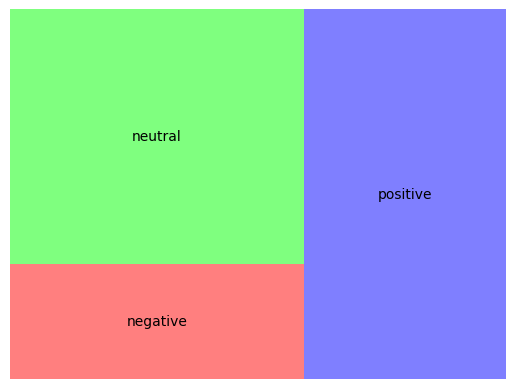

In [7]:
!pip install squarify -qqq

import squarify
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#FF0000', '#00FF00', '#0000FF']

label = data_df.groupby(['sentiment']).count().index.get_level_values(0).tolist()
sizes = data_df.groupby(['sentiment']).count().reset_index()['airline'].tolist()

squarify.plot(sizes=sizes, label=label, color = colors, alpha=.5)
plt.axis('off')
plt.show()

['neutral', 'positive', 'negative']
Categories (3, object): ['negative' < 'neutral' < 'positive']


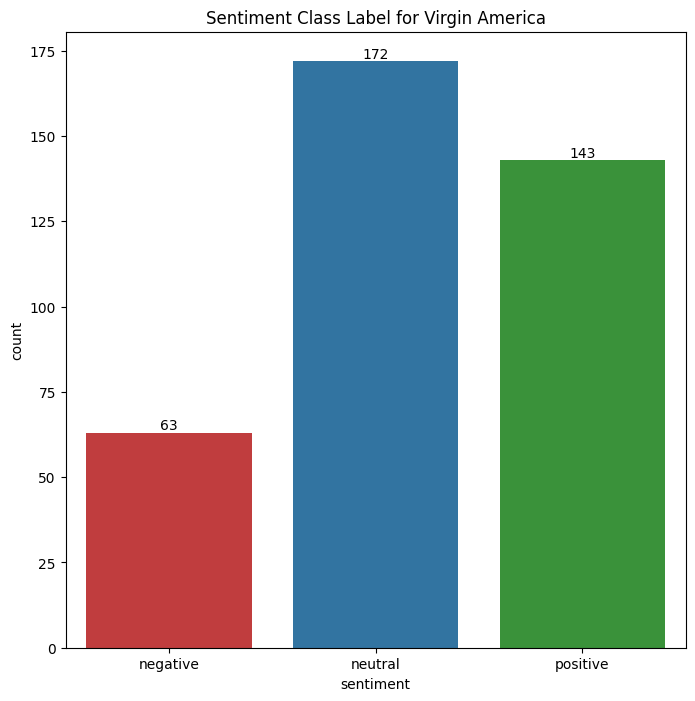

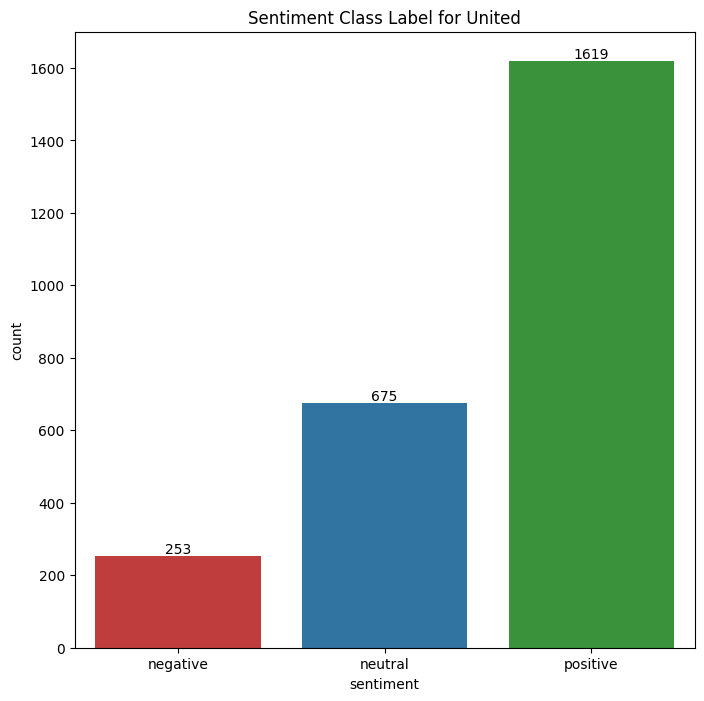

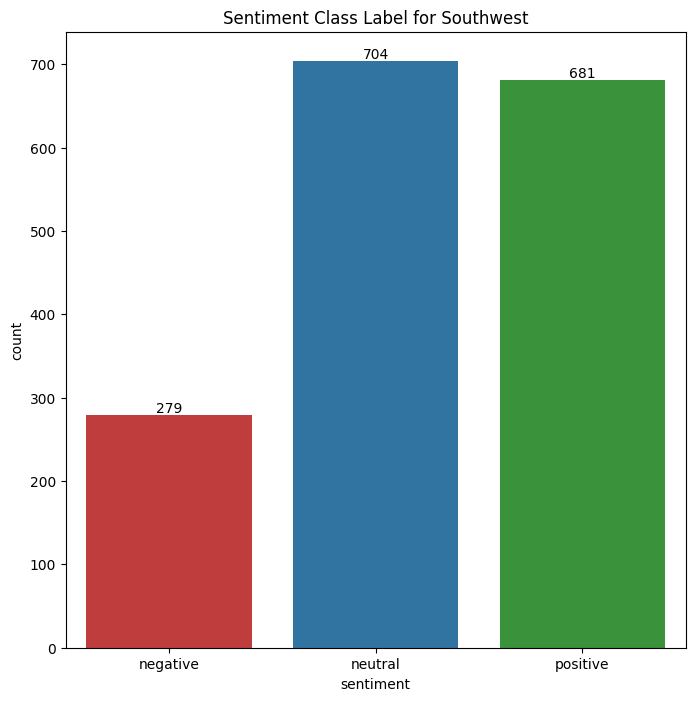

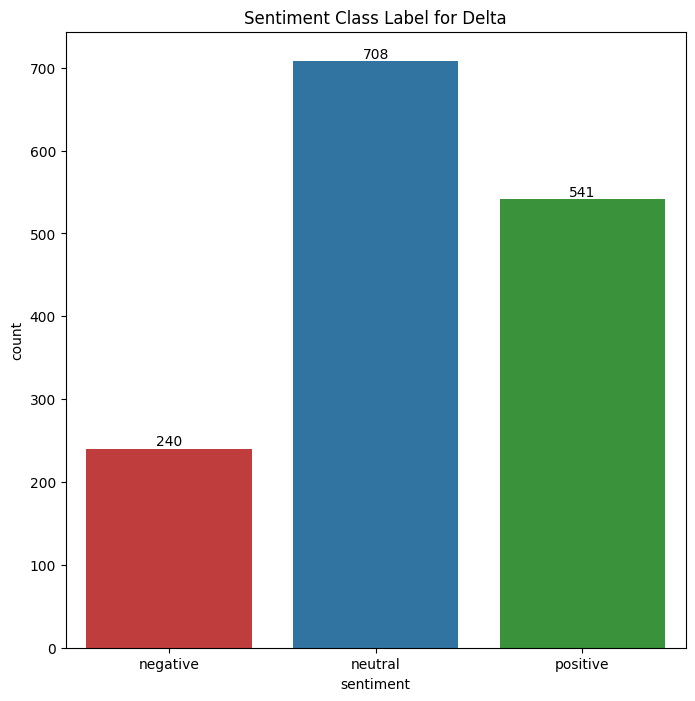

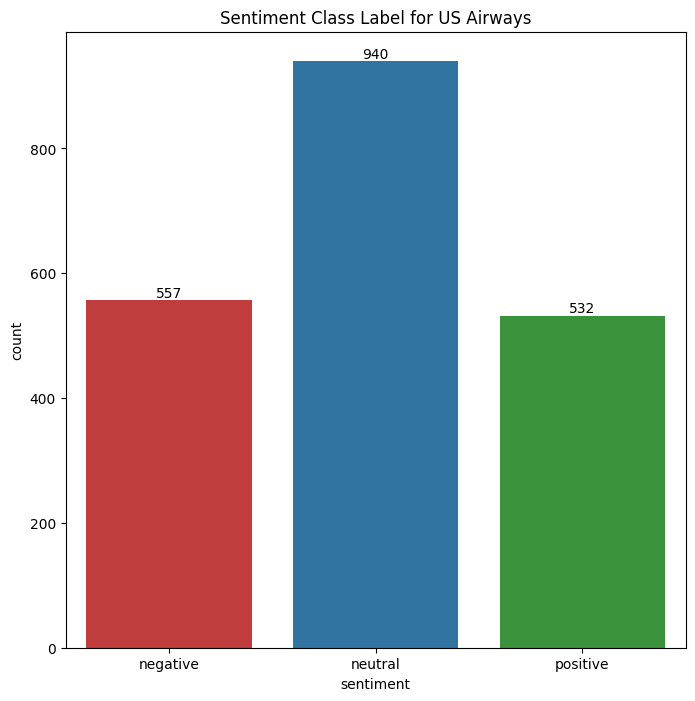

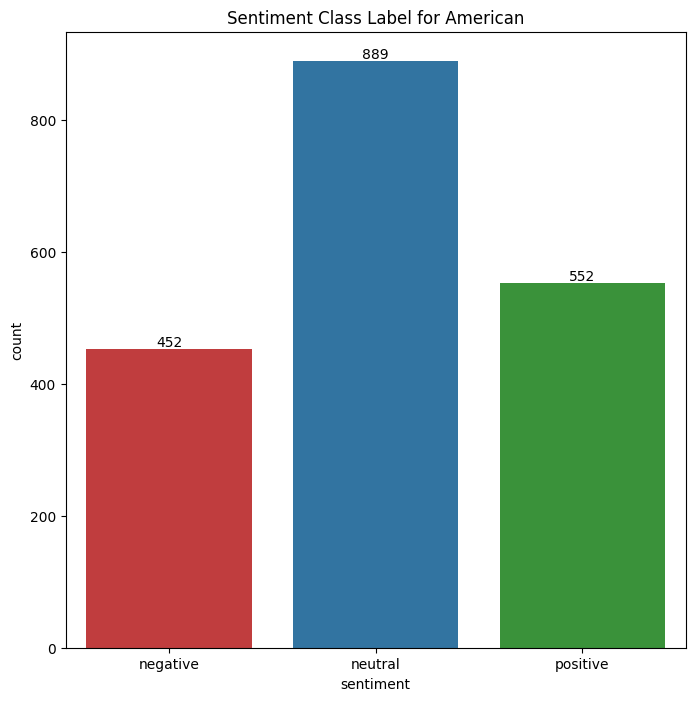

In [8]:
data_df.dropna(subset=['airline'], inplace=True)

print(data_df['sentiment'].unique())

palette = ['tab:red', 'tab:blue', 'tab:green']

for airline in data_df['airline'].unique():
    plt.figure(figsize=(8, 8))

    # Filter data for the current airline
    subset_df = data_df[data_df['airline'] == airline]

    # Plot countplot
    sns.countplot(x='sentiment', data=subset_df, palette=palette)

    plt.title(f'Sentiment Class Label for {airline}')

    ax = plt.gca()

    # Add count annotations on top of the bars
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f'{int(p.get_height())}',
                color='black', ha='center', va='bottom')

    plt.show()


In [27]:
data_df.to_csv('AirlineSentimentIntegrated.csv', index=False)

In [9]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

text = ' '.join(data_df['text'])
tokenized_word = word_tokenize(text)

print(tokenized_word)


fdist = FreqDist(tokenized_word)

plt.figure(figsize=(10,10))
fdist.plot(30, cumulative=False)
plt.show()

nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
new_stopwords = ["I", "u", "united", "get", "USAirways", "AmericanAir",
                 "SouthwestAir", "VirginAmerica", "JetBlue"]

new_stopwords_list = stop_words.union(new_stopwords)

filtered_sent = []

for w in tokenized_word:
  if w not in new_stopwords_list:
    filtered_sent.append(w)

print("FIltered Sentence: ", filtered_sent)

fdist = FreqDist(filtered_sent)

plt.figure(figsize=(10,10))
fdist.plot(30, cumulative=False)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [10]:
from wordcloud import WordCloud

for sentiments in data_df['sentiment'].unique():
  plt.figure(figsize=(8, 8))

  # Filter data for the current airline
  subset_df = data_df[data_df['sentiment'] == sentiments]

  text = ' '.join(subset_df['text'])
  tokenized_word = word_tokenize(text)

  print(tokenized_word)


  fdist = FreqDist(tokenized_word)

  plt.figure(figsize=(10,10))
  fdist.plot(30, cumulative=False)
  # plt.show()

  nltk.download('stopwords')

  stop_words = set(stopwords.words("english"))
  new_stopwords = ["I", "u", "united", "get", "USAirways", "AmericanAir",
                 "SouthwestAir", "VirginAmerica", "JetBlue"]

  new_stopwords_list = stop_words.union(new_stopwords)

  filtered_sent = []

  for w in tokenized_word:
    if w not in new_stopwords_list:
      filtered_sent.append(w)

  print("FIltered Sentence: ", filtered_sent)

  fdist = FreqDist(filtered_sent)

  plt.figure(figsize=(10,10))
  fdist.plot(30, cumulative=False)
  # plt.show()

  wordcloud = WordCloud(
  background_color='black',
  width=3000,
  height=2500
  ).generate(' '.join(filtered_sent))

  # Display the word cloud using matplotlib
  plt.figure(figsize=(10, 8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [11]:
import re

def review_to_words(review):
  letters_only = re.sub('[^a-zA-Z]', " ", review)
  words = letters_only.lower().split()
  meaningful_words = [w for w in words if not w in new_stopwords]
  return(" ".join(meaningful_words))

data_df['word'] = data_df['text'].apply(lambda x: review_to_words(x))

In [12]:
print(data_df['word'])

0       virginamerica plus you ve added commercials to...
1       virginamerica it s really aggressive to blast ...
2       virginamerica yes nearly every time i fly vx t...
3       virginamerica really missed a prime opportunit...
4              virginamerica well i didn t but now i do d
                              ...                        
9995                 americanair dming you now big thanks
9996    americanair is overweight so you pull dozen pa...
9997    americanair i love your company and your staff...
9998    americanair i wait hrs for cs to call me back ...
9999    americanair i ve been on hold for mins about m...
Name: word, Length: 10000, dtype: object


In [13]:
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train, test = train_test_split(data_df, test_size=.3, random_state=5)

In [14]:
print(train['word'])

2926    southwestair hello been on hold for extremely ...
4634    jetblue our fleet s on fleek http t co b ttno ...
416     good to know you will open the closed doors fo...
6369    usairways you idiots kept an on time plane on ...
7952    usairways any word on flight getting out of df...
                              ...                        
3046    southwestair it s just the principle it s hard...
9917    americanair been waiting in line for over an h...
4079    southwestair dm sent thanks so much for respon...
2254    i was abused threatened and forced to travel i...
2915    new apple cr pe amazing live from ua really ni...
Name: word, Length: 7000, dtype: object


In [15]:
train_clean_words = []
test_clean_words = []

# for words in train['word']:
#   individual_words = words.split()
#   train_clean_words.extend(individual_words)

# for words in test['word']:
#   individual_words = words.split()
#   test_clean_words.extend(individual_words)

train_clean_words = train['text'].tolist()
test_clean_words = test['text'].tolist()

In [16]:
print(train_clean_words)

['SouthwestAir Hello   been on hold for extremely long time  Have confirmation    amp  can t get boarding pass  Have tried numerous times', 'JetBlue  Our fleet s on fleek  http   t co b ttno  xu    I just', 'united good to know you will open the closed doors for  premier passengers  after safety briefings on delayed flights   annoyed', 'USAirways you idiots kept an on time plane on the Tarmac for over an hour forcing us to not be there    minutes before', 'USAirways any word on flight      getting out of DFW in the near future  Stuck on plane at gate for over an hour', 'SouthwestAir schedule is open through the end of October  got Columbus day wknd in New England for    K points for    Check your calendar', 'SouthwestAir  Tried for VIP Live in The Vineyard but yr site went down  by the time I got in   redeem pts those packages gone', 'united a good start would be  to warm the plane before the departure time so the flight isn t delayed due to frozen water lines', 'AmericanAir trying to 

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(analyzer = 'word')

train_features = v.fit_transform(train_clean_words)
test_features = v.transform(test_clean_words)
print(train_features)

ar_train_features = train_features.toarray()
ar_test_features = test_features.toarray()

  (0, 7269)	1
  (0, 3501)	1
  (0, 716)	1
  (0, 5486)	1
  (0, 3581)	1
  (0, 2954)	1
  (0, 2662)	1
  (0, 4589)	1
  (0, 7875)	1
  (0, 3451)	2
  (0, 1571)	1
  (0, 299)	1
  (0, 1107)	1
  (0, 3169)	1
  (0, 862)	1
  (0, 5700)	1
  (0, 8028)	1
  (0, 5391)	1
  (0, 7879)	1
  (1, 5486)	1
  (1, 4110)	1
  (1, 5575)	1
  (1, 2857)	1
  (1, 2856)	1
  (1, 3677)	1
  :	:
  (6998, 1077)	1
  (6998, 6798)	1
  (6999, 3677)	1
  (6999, 1430)	1
  (6999, 8218)	1
  (6999, 5211)	1
  (6999, 4525)	1
  (6999, 283)	1
  (6999, 7939)	1
  (6999, 5236)	1
  (6999, 6330)	1
  (6999, 3038)	1
  (6999, 274)	1
  (6999, 1739)	1
  (6999, 5182)	1
  (6999, 3439)	1
  (6999, 7786)	1
  (6999, 8129)	2
  (6999, 393)	1
  (6999, 1712)	1
  (6999, 5750)	1
  (6999, 806)	1
  (6999, 3375)	1
  (6999, 3279)	1
  (6999, 4134)	1


In [18]:
dt = DecisionTreeClassifier()

dt_mdl = dt.fit(ar_train_features, train['sentiment'])

dt_pred = dt_mdl.predict(ar_test_features)

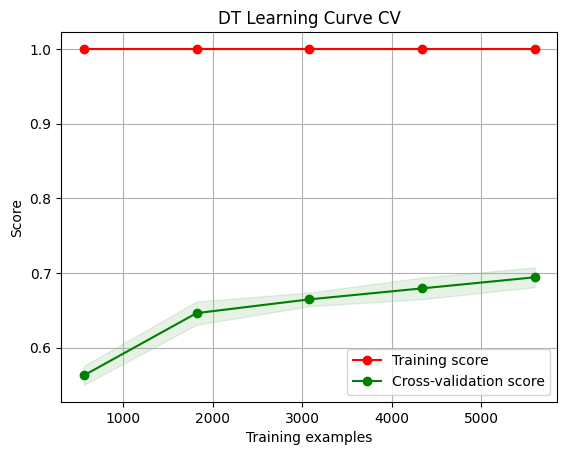

In [19]:
!pip install scikit-plot -qqq
import scikitplot as skplot

skplot.estimators.plot_learning_curve(dt, ar_train_features, train['sentiment'],
                                      title="DT Learning Curve CV")

plt.show()

In [20]:
print('Accuracy: ', accuracy_score(test['sentiment'], dt_pred))
print(confusion_matrix(test['sentiment'], dt_pred))
print(classification_report(test['sentiment'], dt_pred))


Accuracy:  0.7023333333333334
[[308 186  58]
 [145 876 209]
 [ 53 242 923]]
              precision    recall  f1-score   support

    negative       0.61      0.56      0.58       552
     neutral       0.67      0.71      0.69      1230
    positive       0.78      0.76      0.77      1218

    accuracy                           0.70      3000
   macro avg       0.69      0.68      0.68      3000
weighted avg       0.70      0.70      0.70      3000



<Axes: title={'center': 'ROC Curve DT CV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

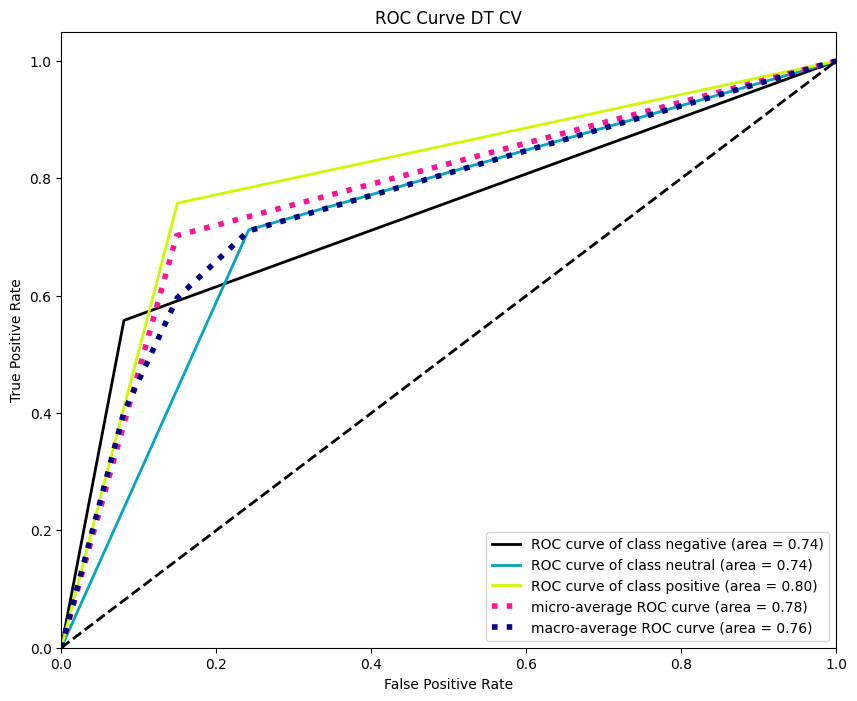

In [21]:
dt_pred_probas = dt_mdl.predict_proba(ar_test_features)

skplot.metrics.plot_roc(test['sentiment'], dt_pred_probas, figsize=(10,8),
                        title='ROC Curve DT CV')

Accuracy:  0.6793333333333333
[[ 104  399   49]
 [  20 1009  201]
 [   5  288  925]]
              precision    recall  f1-score   support

    negative       0.81      0.19      0.31       552
     neutral       0.59      0.82      0.69      1230
    positive       0.79      0.76      0.77      1218

    accuracy                           0.68      3000
   macro avg       0.73      0.59      0.59      3000
weighted avg       0.71      0.68      0.65      3000



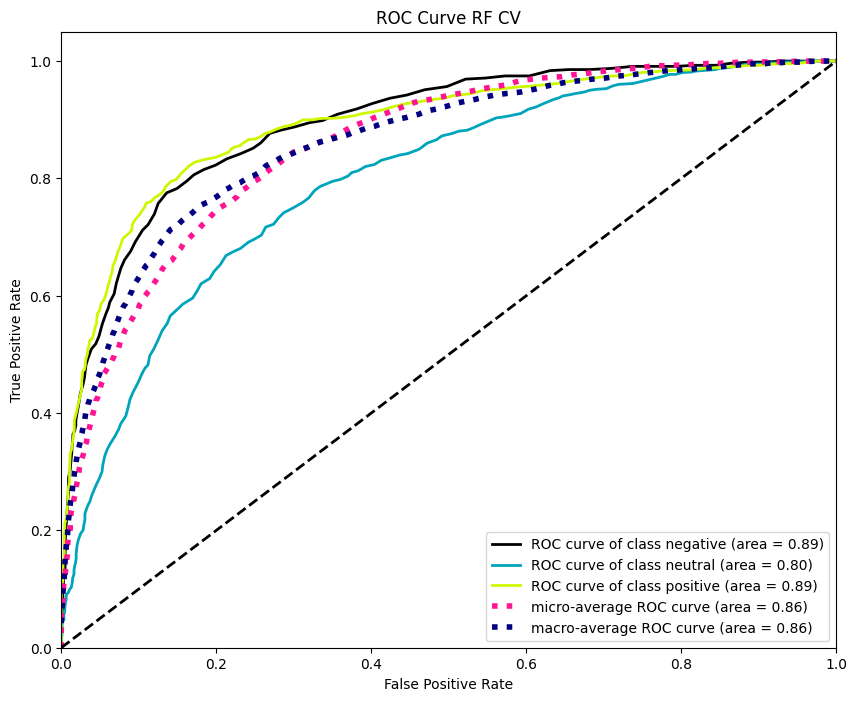

In [22]:
rf = RandomForestClassifier(n_estimators=200)

rf_mdl = rf.fit(ar_train_features, train['sentiment'])
rf_pred = rf_mdl.predict(ar_test_features)

print('Accuracy: ', accuracy_score(test['sentiment'], rf_pred))
print(confusion_matrix(test['sentiment'], rf_pred))
print(classification_report(test['sentiment'], rf_pred))

rf_predict_probas = rf_mdl.predict_proba(ar_test_features)

skplot.metrics.plot_roc(test['sentiment'], rf_predict_probas, figsize=(10,8),
                        title='ROC Curve RF CV')
plt.show()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(stop_words='english')

train_features = tf.fit_transform(train_clean_words)
test_features = tf.transform(test_clean_words)
print(train_features)

ar_train_features = train_features.toarray()
ar_test_features = test_features.toarray()

  (0, 7653)	0.2658494341158541
  (0, 5238)	0.39522302814880783
  (0, 7796)	0.26885790273289395
  (0, 5528)	0.303462317903165
  (0, 817)	0.26824125744656496
  (0, 281)	0.20647857489238486
  (0, 1516)	0.3060430534286471
  (0, 7649)	0.19342992748255028
  (0, 4463)	0.2658494341158541
  (0, 2581)	0.3441681953135893
  (0, 3473)	0.2049384695782842
  (0, 3398)	0.3362010860842568
  (0, 7069)	0.13757183500150058
  (1, 4067)	0.22807579369253897
  (1, 8572)	0.5641936549761754
  (1, 7836)	0.5641936549761754
  (1, 3567)	0.2200820008768159
  (1, 2768)	0.3409750316934223
  (1, 2769)	0.3385594770433101
  (1, 3989)	0.17896897177068066
  (2, 316)	0.36167000942551614
  (2, 2800)	0.18104449305446543
  (2, 1870)	0.18918583524192828
  (2, 917)	0.4018665148056086
  (2, 6590)	0.30085504447310313
  :	:
  (6998, 8608)	0.23425590472005828
  (6998, 3552)	0.2544654458823795
  (6998, 2867)	0.27881922606983467
  (6998, 6714)	0.19900461843666928
  (6998, 7767)	0.20215583328653713
  (6998, 2780)	0.09688176717008828
  (

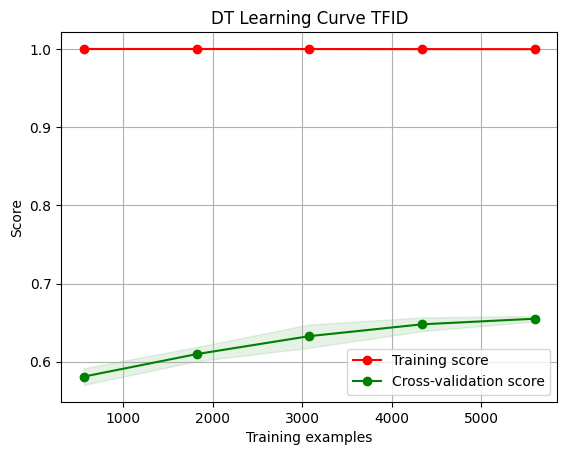

Accuracy:  0.6573333333333333
[[277 203  72]
 [139 826 265]
 [ 47 302 869]]
              precision    recall  f1-score   support

    negative       0.60      0.50      0.55       552
     neutral       0.62      0.67      0.65      1230
    positive       0.72      0.71      0.72      1218

    accuracy                           0.66      3000
   macro avg       0.65      0.63      0.64      3000
weighted avg       0.66      0.66      0.66      3000



In [24]:
dt = DecisionTreeClassifier()

dt_mdl = dt.fit(ar_train_features, train['sentiment'])

dt_pred = dt_mdl.predict(ar_test_features)
skplot.estimators.plot_learning_curve(dt, ar_train_features, train['sentiment'],
                                      title="DT Learning Curve TFID")

plt.show()

print('Accuracy: ', accuracy_score(test['sentiment'], dt_pred))
print(confusion_matrix(test['sentiment'], dt_pred))
print(classification_report(test['sentiment'], dt_pred))

<Axes: title={'center': 'ROC Curve DT TFID'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

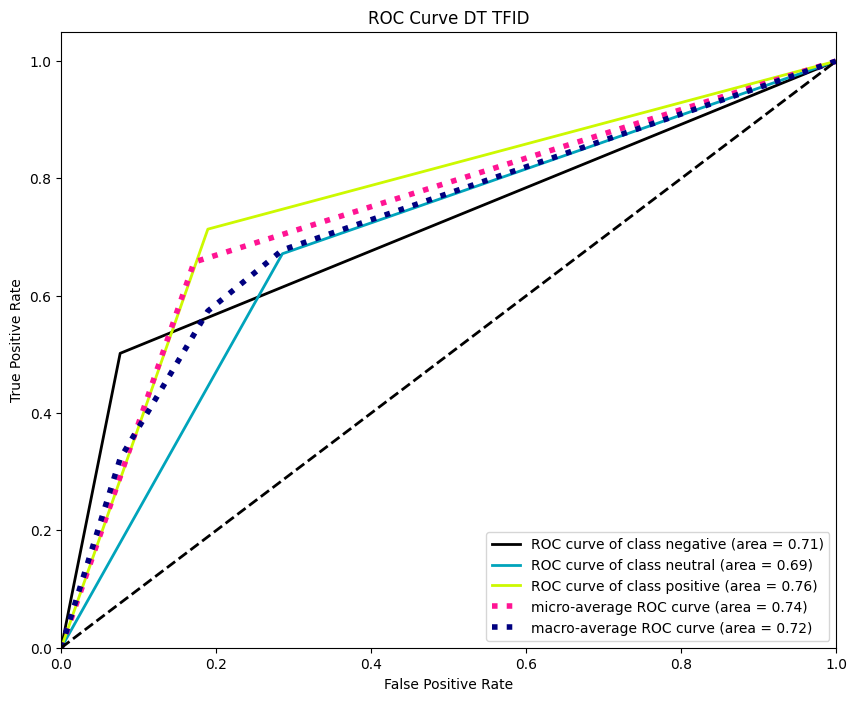

In [25]:
dt_pred_probas = dt_mdl.predict_proba(ar_test_features)

skplot.metrics.plot_roc(test['sentiment'], dt_pred_probas, figsize=(10,8),
                        title='ROC Curve DT TFID')

Accuracy:  0.6956666666666667
[[185 312  55]
 [ 47 955 228]
 [  7 264 947]]
              precision    recall  f1-score   support

    negative       0.77      0.34      0.47       552
     neutral       0.62      0.78      0.69      1230
    positive       0.77      0.78      0.77      1218

    accuracy                           0.70      3000
   macro avg       0.72      0.63      0.64      3000
weighted avg       0.71      0.70      0.68      3000



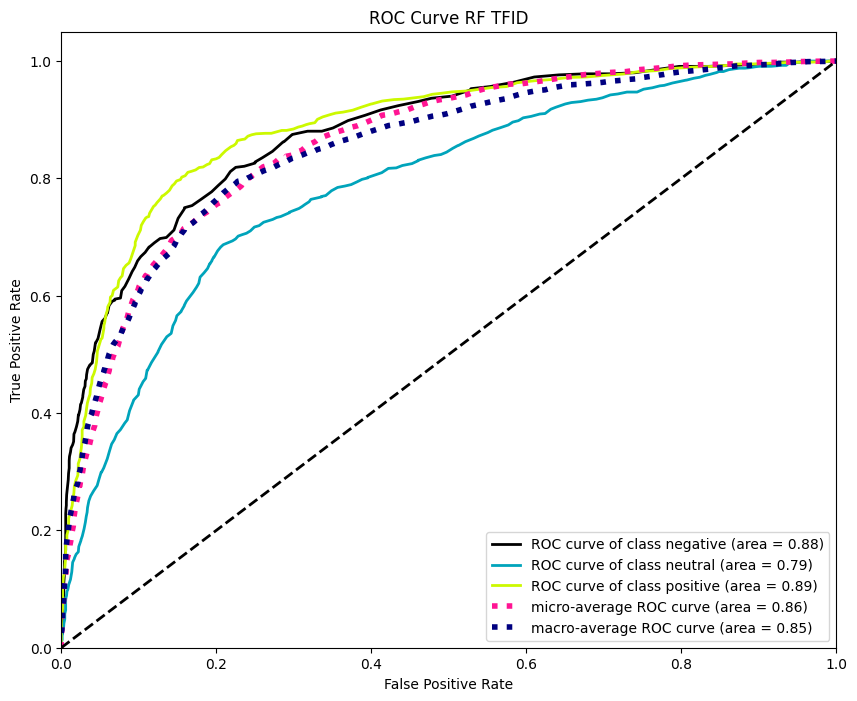

In [26]:
rf = RandomForestClassifier(n_estimators=200)

rf_mdl = rf.fit(ar_train_features, train['sentiment'])
rf_pred = rf_mdl.predict(ar_test_features)

print('Accuracy: ', accuracy_score(test['sentiment'], rf_pred))
print(confusion_matrix(test['sentiment'], rf_pred))
print(classification_report(test['sentiment'], rf_pred))

rf_predict_probas = rf_mdl.predict_proba(ar_test_features)

skplot.metrics.plot_roc(test['sentiment'], rf_predict_probas, figsize=(10,8),
                        title='ROC Curve RF TFID')
plt.show()